In [1]:
from pyngrok import ngrok
import streamlit as st

In [2]:
import tensorflow as tf
model_location = r'working\models\rgb_model.h5'

In [3]:
model = tf.keras.models.load_model(model_location)

In [4]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dropout_1 (Dropout)         (None, 32768)             0         
                                                                 
 dense_2 (Dense)             (None, 150)               4915350   
                                                                 
 dense_3 (Dense)             (None, 10)                1510      
                                                                 
Total params: 28,504,572
Trainable params: 28,451,452
Non-trainable params: 53,120
_________________________________________________________________


In [16]:
%%writefile app.py
st.title('Hyperspectral Image Classification')

Writing app.py


In [28]:
python -m streamlit run your_script.py


^C


In [14]:
import numpy as np
import tensorflow as tf
image = tf.keras.utils.load_img(r"Dataset/EuroSAT/Residential/Residential_504.jpg", target_size=(100,100,3))
input_arr = tf.keras.utils.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = model.predict(input_arr)
output_class_id = np.argmax(predictions, axis=1)
output_class_id

1/1 [==============================] - 0s 442ms/step


array([9], dtype=int64)

In [10]:
class_name_list = np.array(['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway',
       'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River',
       'SeaLake'])

In [11]:
class_name_list[output_class_id]

array(['SeaLake'], dtype='<U20')

1/1 [==============================] - 0s 76ms/step
AnnualCrop


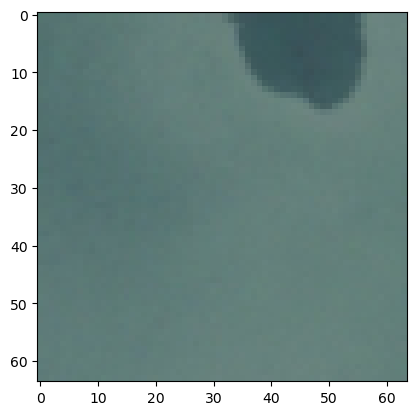

In [20]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
img = image.load_img(r'C:\Users\david\Data_Sciences\DL\Kaggle\EuroSAT\Dataset\EuroSAT\SeaLake\SeaLake_37.jpg', target_size=(64, 64))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.hstack([x])
classes = model.predict(images, batch_size=32)
print(class_name_list[np.argmax(classes)])

In [24]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from keras.applications.resnet import preprocess_input
file_name=r'C:\Users\david\Data_Sciences\DL\Kaggle\EuroSAT\Dataset\EuroSAT\SeaLake\SeaLake_37.jpg'
my_image=0
#load the image
my_image = load_img(file_name, target_size=(64, 64))
#preprocess the image
my_image = img_to_array(my_image)
my_image = my_image.reshape((1, my_image.shape[0], my_image.shape[1], my_image.shape[2]))
my_image = preprocess_input(my_image)
result=model.predict(my_image)
import numpy as np
class_value=np.argmax(result)
print(class_name_list[np.argmax(classes)])

1/1 [==============================] - 0s 75ms/step
AnnualCrop
